In [1]:
from experiment import Experiment
%matplotlib inline

/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
var_dict = dict(
    numerical_vars = ['A2','A3','A8','A11','A14','A15'],
    categorical_vars = ['A1','A4','A5','A6','A7','A9','A10','A12','A13'],
    class_var = 'class'
)

In [3]:
exp = Experiment('data/credit1.csv', 
                 var_dict,
                 embedding_dim=8,
                 lr=0.2,
                 cv=5,
                 weight_decay=0.0,
                 batch_size=1024,
                 n_epoch=100,
                 verbose=True,
                 n_bins_range=[3, 5, 10],
                 n_init_bins_list=[5, 10, 15])

In [4]:
exp.data.shape

(654, 16)

In [5]:
exp.perform_exp()

/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:819: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:819: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:819: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:819: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:819: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -


>>> Epoch = 1
Loss = 2.2992513179779053
[2, 2, 2, 2, 4, 2] 0.470753009122
>>> Epoch = 2
Loss = 1.5640422105789185
[4, 3, 2, 2, 2, 2] 0.472683090607
>>> Epoch = 3
Loss = 1.479956865310669
[2, 3, 2, 2, 3, 3] 0.484101158017
>>> Epoch = 4
Loss = 1.4211729764938354
[3, 3, 2, 2, 2, 3] 0.519714112657
>>> Epoch = 5
Loss = 1.3347328901290894
[4, 3, 2, 2, 2, 3] 0.587069298105
>>> Epoch = 6
Loss = 1.0885295867919922
[3, 3, 2, 3, 2, 3] 0.668016458493
>>> Epoch = 7
Loss = 1.4086461067199707
[2, 3, 2, 2, 4, 3] 0.595276356114
>>> Epoch = 8
Loss = 0.9141015410423279
[3, 2, 2, 3, 2, 3] 0.66853882258
>>> Epoch = 9
Loss = 1.0397840738296509
[3, 2, 2, 2, 2, 3] 0.691069360864
>>> Epoch = 10
Loss = 1.324768304824829
[2, 2, 2, 2, 2, 3] 0.675905039875
>>> Epoch = 11
Loss = 1.1833184957504272
[2, 2, 2, 2, 2, 3] 0.669994397338
>>> Epoch = 12
Loss = 1.084861159324646
[3, 2, 2, 2, 2, 3] 0.653183457295
>>> Epoch = 13
Loss = 0.9646096229553223
[3, 2, 2, 2, 2, 3] 0.691798971717
>>> Epoch = 14
Loss = 1.17535114288330

>>> Epoch = 11
Loss = 1.4206247329711914
[2, 2, 2, 2, 4, 2] 0.67110419465
>>> Epoch = 12
Loss = 1.3310493230819702
[8, 2, 2, 2, 4, 2] 0.722948622483
>>> Epoch = 13
Loss = 1.1428308486938477
[2, 2, 2, 2, 4, 2] 0.707593212565
>>> Epoch = 14
Loss = 1.4291883707046509
[9, 2, 2, 2, 3, 2] 0.691200556502
>>> Epoch = 15
Loss = 1.2037323713302612
[2, 2, 2, 2, 5, 2] 0.668413960113
>>> Epoch = 16
Loss = 1.1524920463562012
[2, 2, 2, 2, 4, 2] 0.69811626978
>>> Epoch = 17
Loss = 1.2839325666427612
[9, 2, 2, 2, 4, 2] 0.681134708508
>>> Epoch = 18
Loss = 1.0227855443954468
[8, 2, 2, 2, 4, 2] 0.7041272921
>>> Epoch = 19
Loss = 1.29246985912323
[9, 2, 2, 2, 3, 2] 0.66905417163
>>> Epoch = 20
Loss = 0.9222310781478882
[9, 2, 2, 2, 3, 2] 0.67518085475
>>> Epoch = 21
Loss = 1.2520115375518799
[9, 2, 2, 2, 3, 2] 0.700620207862
>>> Epoch = 22
Loss = 1.30426824092865
[9, 2, 2, 2, 3, 2] 0.697277333639
>>> Epoch = 23
Loss = 1.0214941501617432
[8, 2, 2, 2, 3, 2] 0.704068220894
>>> Epoch = 24
Loss = 1.13084423542

>>> Epoch = 21
Loss = 1.3484292030334473
[7, 2, 2, 2, 3, 2] 0.620999076822
>>> Epoch = 22
Loss = 1.3827248811721802
[7, 2, 2, 2, 4, 2] 0.634140839066
>>> Epoch = 23
Loss = 1.081519603729248
[4, 2, 2, 2, 4, 2] 0.651985171203
>>> Epoch = 24
Loss = 1.2078981399536133
[2, 2, 2, 2, 4, 2] 0.696705299592
>>> Epoch = 25
Loss = 1.319726824760437
[2, 2, 2, 2, 3, 2] 0.665235494302
>>> Epoch = 26
Loss = 1.5837655067443848
[2, 2, 2, 2, 3, 2] 0.656379571091
>>> Epoch = 27
Loss = 1.275179147720337
[2, 2, 2, 2, 3, 2] 0.660616579853
>>> Epoch = 28
Loss = 1.2526836395263672
[3, 2, 2, 2, 3, 2] 0.603220106095
>>> Epoch = 29
Loss = 1.4145822525024414
[4, 2, 2, 2, 3, 2] 0.615197060806
>>> Epoch = 30
Loss = 1.2695472240447998
[4, 2, 2, 2, 5, 2] 0.607417041016
>>> Epoch = 31
Loss = 1.210766077041626
[5, 2, 2, 2, 2, 2] 0.602287350974
>>> Epoch = 32
Loss = 1.225332260131836
[5, 2, 2, 2, 2, 2] 0.602080555784
>>> Epoch = 33
Loss = 1.288588047027588
[4, 2, 2, 2, 3, 2] 0.609160060101
>>> Epoch = 34
Loss = 1.2566697

In [6]:
result = exp.get_result()

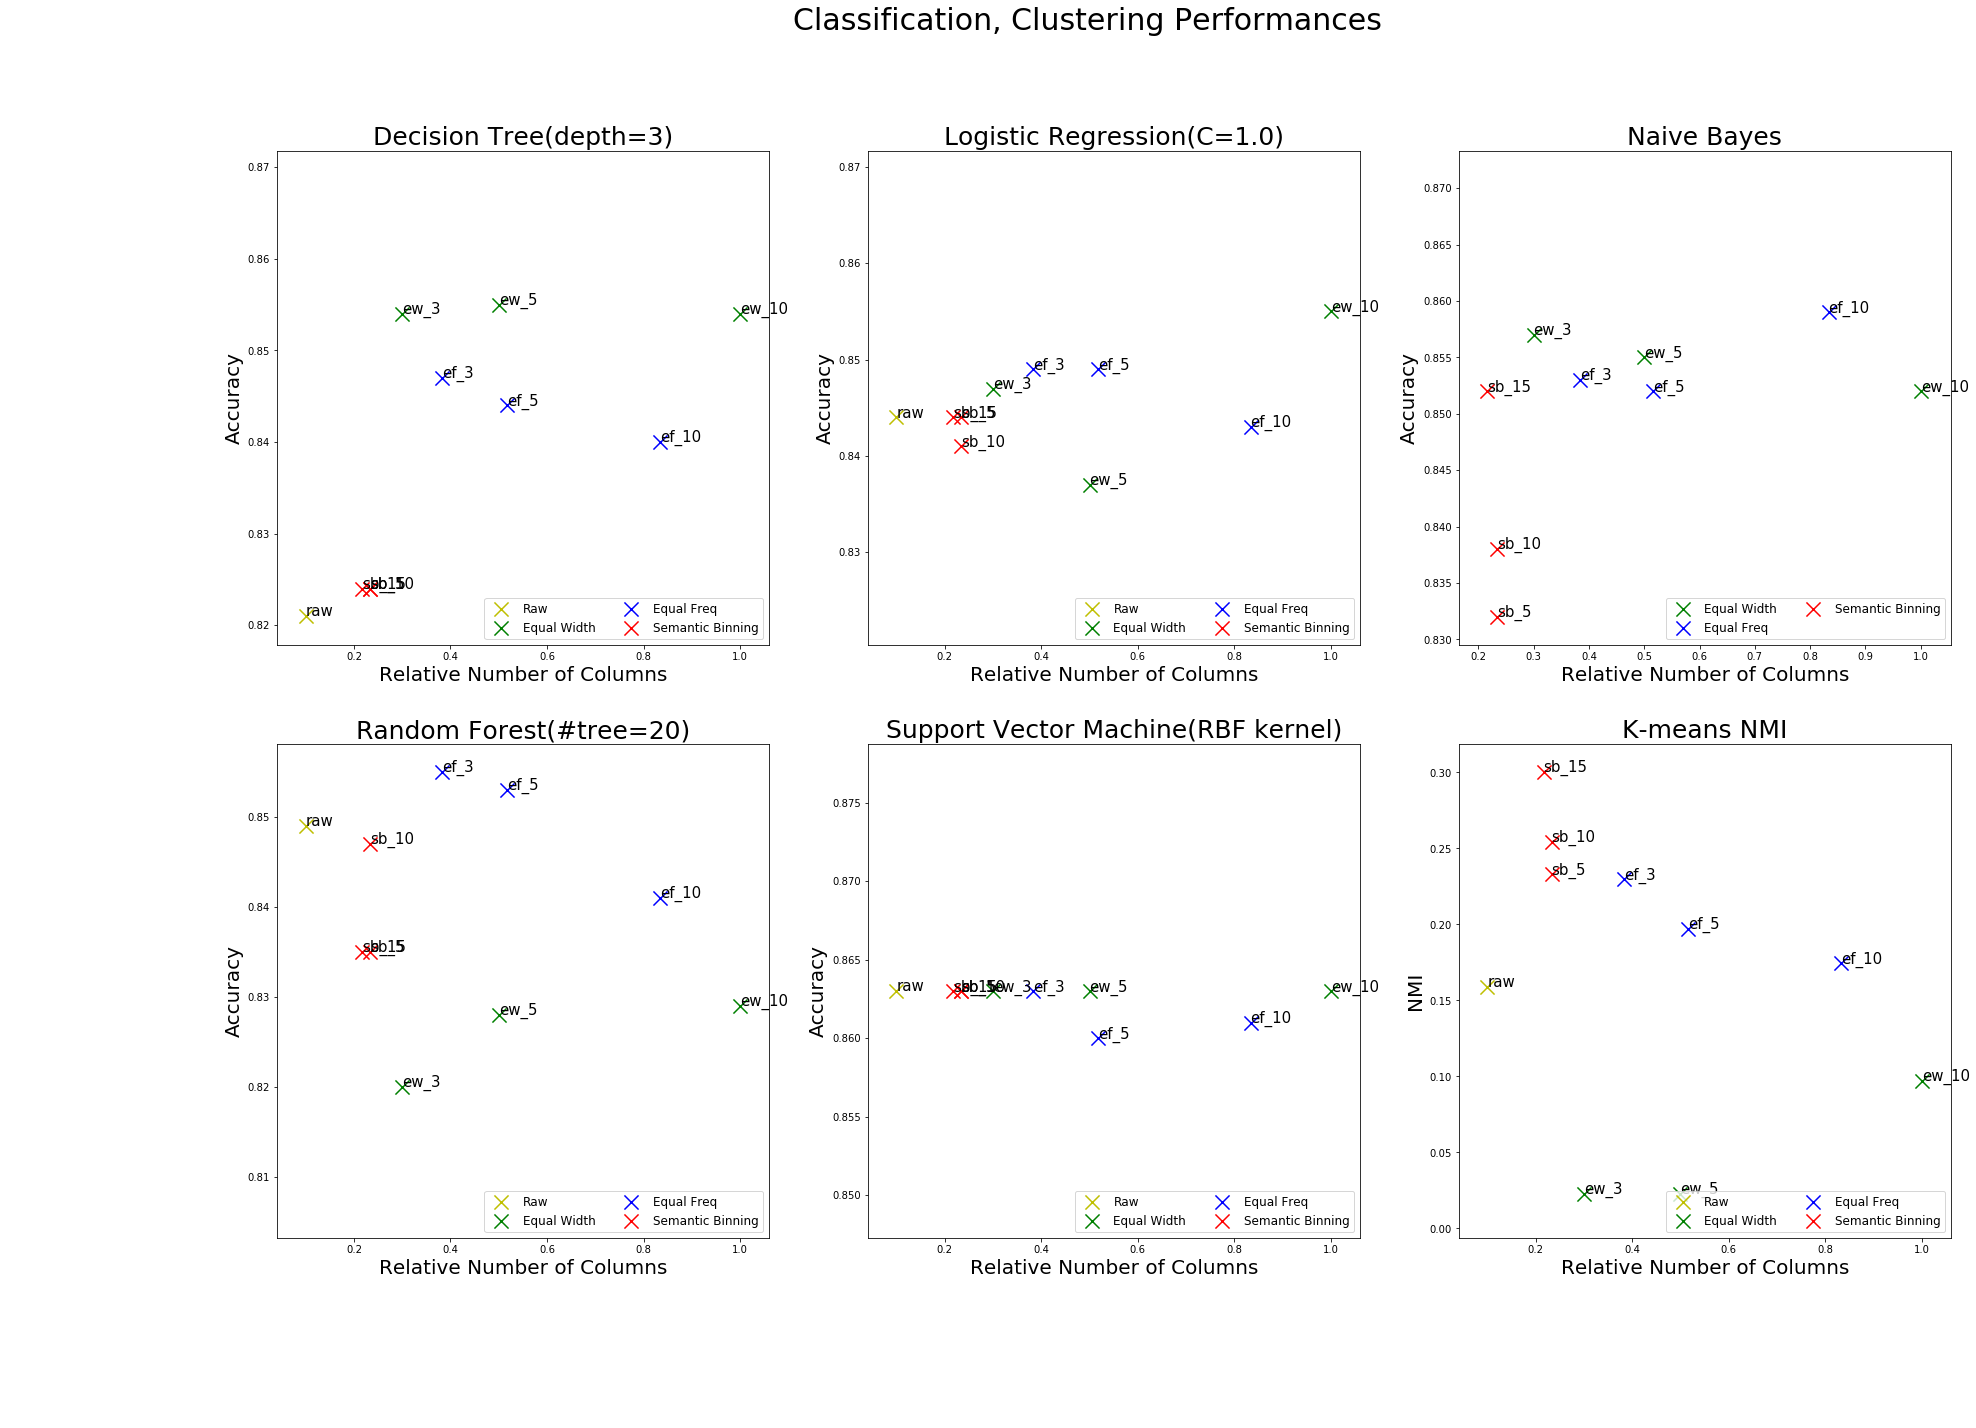

In [7]:
exp.plot_model_comparison_chart(result)

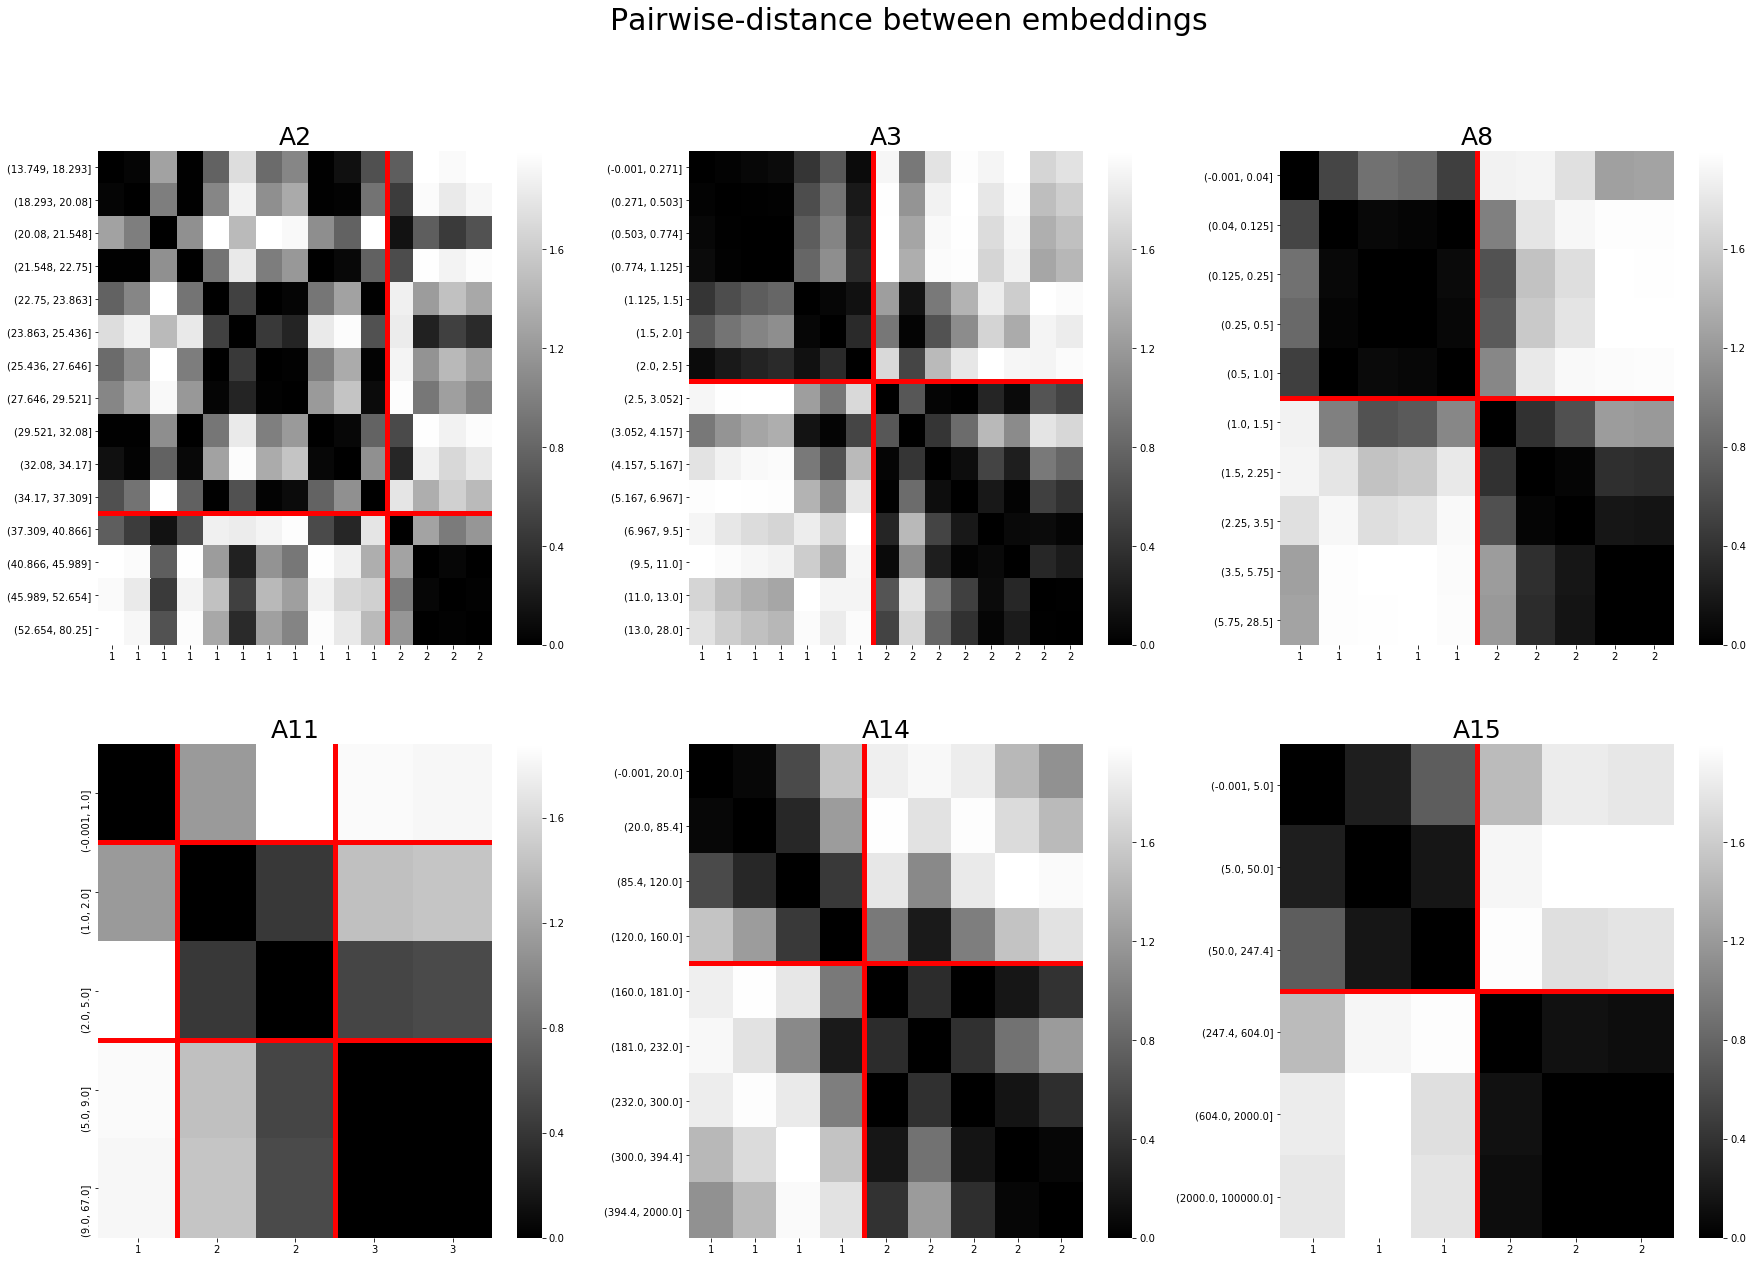

In [8]:
exp.plot_pairwise_distance_matrices()

In [9]:
result

,disc_method,dt_acc_depth=2,dt_acc_depth=3,dt_acc_depth=4,dt_acc_depth=5,dt_acc_depth=6,kmeans_nmi,lr_acc_C=0.1,lr_acc_C=0.3,lr_acc_C=0.5,lr_acc_C=1.0,lr_acc_C=3.0,n_disc_cols,nb_acc,rf_acc_n_est=10,rf_acc_n_est=20,rf_acc_n_est=30,rf_acc_n_est=5,svm_acc
0,raw,0.863,0.821,0.817,0.814,0.803,0.158798,0.846,0.844,0.843,0.844,0.844,6,0.453,0.841,0.849,0.850,0.837,0.863
1,sb_5,0.863,0.824,0.820,0.827,0.847,0.232944,0.855,0.852,0.846,0.844,0.843,14,0.832,0.837,0.835,0.841,0.837,0.863
2,sb_10,0.863,0.824,0.818,0.820,0.829,0.254337,0.844,0.844,0.844,0.841,0.838,14,0.838,0.850,0.847,0.850,0.841,0.863
3,sb_15,0.863,0.824,0.841,0.832,0.841,0.300410,0.853,0.850,0.852,0.844,0.843,13,0.852,0.850,0.835,0.840,0.831,0.863
4,ew_3,0.863,0.854,0.826,0.829,0.824,0.022607,0.852,0.852,0.850,0.847,0.844,18,0.857,0.814,0.820,0.824,0.805,0.863
5,ef_3,0.863,0.847,0.832,0.832,0.844,0.229627,0.864,0.855,0.852,0.849,0.843,23,0.853,0.847,0.855,0.867,0.844,0.863
6,ew_5,0.863,0.855,0.828,0.840,0.829,0.022607,0.852,0.844,0.841,0.837,0.838,30,0.855,0.824,0.828,0.826,0.809,0.863
7,ef_5,0.863,0.844,0.827,0.821,0.815,0.197269,0.854,0.854,0.857,0.849,0.843,31,0.852,0.858,0.853,0.858,0.861,0.860
8,ew_10,0.863,0.854,0.831,0.826,0.814,0.097037,0.850,0.852,0.854,0.855,0.838,60,0.852,0.832,0.829,0.838,0.815,0.863
9,ef_10,0.863,0.840,0.837,0.820,0.823,0.174438,0.855,0.849,0.846,0.843,0.837,50,0.859,0.815,0.841,0.840,0.803,0.861
